<div style="display: flex">
  <img src="./resources/images/notebook1_main_image.png" alt="Your Image" style="width: 20%;">
  <div style="flex-grow: 1; padding-left: 20px;">
    <h1> Notebook 1: Influence of Neural Network (NN) size on the training on MNIST dataset.</h1>
    <h3>This document analyzes how changing the number of neurons in the hidden layers of NN affects training speed and performance. Since this is the first notebook of this series, I am also going to quickly explain the definition of Neural Network. </h3>
    <h3>Every notebook will operate on the <b>MNIST dataset</b> - a large database of handwritten digits that is commonly used in the Deep Learning community. I've chosen this dataset because it is one of the most famous datasets/benchmarks for Deep Learning application.</h3>
    <br>
    <h2> <b>Why do we even care? </b></h2>
    <h3>Experimenting with different sizes of neural networks is crucial because it helps find the right balance between model complexity and performance. Smaller networks might underfit and miss important patterns, while larger networks might overfit and capture noise. By testing various sizes, we can optimize the model to achieve the best accuracy and efficiency for the task at hand. One another important aspect is that we can observe the trade-off between model size and its performance, maybe there is a little difference in metrics between the models with n and 5n parameters and we will be satisfied with something a lot smaller :) Finally, understanding something is the main thing, isn't it?</h3>
   *image created with <a href=“https://huggingface.co/spaces/jasperai/flash-diffusion”> Flash Diffusion: FlashPixart.</a>
  </div>
</div>

___
<h3> After this small introduction, let's start by explaining what is a Neural Network, however, <b> I am not going to provide definitions of PyTorch code I use </b>, so you have to know this library beforehand, the definition of NN is just a small recap.  <h3>

### Neural Network Architecture

* A neural network is composed of multiple layers. 
* These layers include an input layer (where data enters the network), one or more hidden layers (where data is processed and transformed), and an output layer (where the final result is produced).

### Neuron Operation

1. Each neuron in a layer receives input signals from the previous layer, combines them with certain strengths (weights), and adds a constant value (bias). 
2. Then, it applies a function (activation function) to this combined input to produce its output. This output is then passed to the neurons in the next layer.

### Forward Propagation

Forward propagation is the process of sending data through the network from the input layer to the output layer:
1. Data enters the input layer.
2. Each neuron in the hidden layers processes the data by combining inputs with weights and biases, applying the activation function, and passing the output to the next layer.
3. This process continues until the data reaches the output layer, which produces the final predictions.

### Loss Function

* The loss function measures how well the neural network's predictions match the actual results. It calculates the difference between the predicted values and the true values. 
* For classification tasks, a common loss function is cross-entropy loss, which evaluates the performance by comparing predicted probabilities with the actual class labels.

### Backpropagation

Backpropagation is the method used to update the network's weights and biases to reduce the error (loss):
1. The network's final prediction is compared to the actual result to calculate the error.
2. This error is propagated backward through the network, starting from the output layer back to the input layer.
3. During this process, the contribution of each weight and bias to the error is determined.
4. The weights and biases are then adjusted to reduce the error, making the network's predictions more accurate.




___
## Okay, let's start to execute code of the first notebook, I will try to not write a lot of text to make it more readable and focus on the results.
### First, I am going to import helper functions I wrote and define some constants, additionally I am setting a seed to make everything as deterministic as possible.

In [1]:
import pandas as pd
import numpy as np
from utils.data import load_mnist, load_mnist_dataloaders
from utils.neural_network_pytorch import NeuralNetwork, training_loop
from utils.plots import create_key_from_size, DrawNN, plot_metric_for_multiple_models
from utils import seed_everything
from typing import List
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns

NUM_TRAINING_EPOCHS = 50
LOSS_FUNCTION = nn.CrossEntropyLoss()
ACTIVATION_FUNCTION = nn.ReLU()
seed_everything(seed=42)

In [2]:
def obtain_results_for_multiple_models(sizes_to_test: List[List[int]], train_dataloader, test_dataloader):
    metrics = {}
    for network_size in sizes_to_test:
        model = NeuralNetwork(input_size=784, hidden_sizes=network_size, output_size=10, activation_function=ACTIVATION_FUNCTION)
        optimizer = optim.Adam(model.parameters(), lr=1e-4)
        results = training_loop(train_dataloader=train_dataloader,
                                test_dataloader=test_dataloader,
                                model=model,
                                loss_function=LOSS_FUNCTION,
                                optimizer=optimizer,
                                num_epochs=NUM_TRAINING_EPOCHS)
        key = create_key_from_size(network_size)
        metrics[key] = results
    return metrics

### Visualization of one of the Neural Networks we are going to test (I am not going to plot first layer, because it's (image width * image height) big and becomes unreadable on the graphic). 

### 10 is the size of output layer (we have 10 classes in the classification problem).

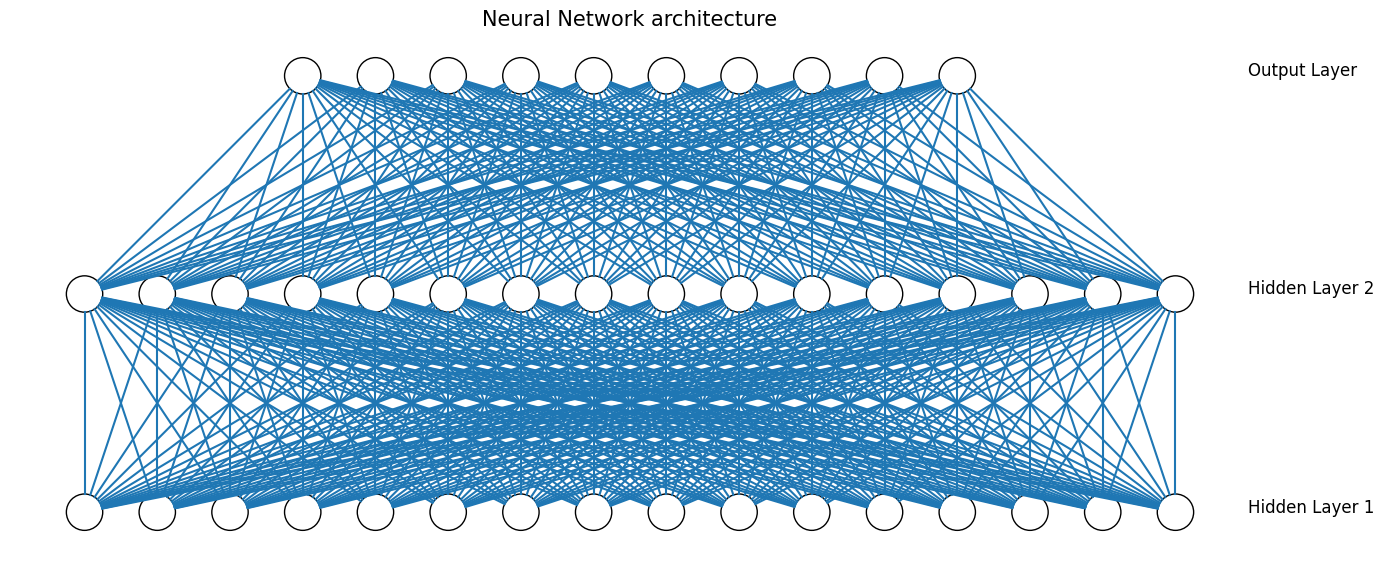

In [3]:
network = DrawNN( [16,16,10] )
network.draw()

### Now, we are loading MNIST dataset, if you do not have it downloaded, don't worry, this cell will do it for you :)

In [4]:
train_set, test_set = load_mnist()
train_dataloader, test_dataloader = load_mnist_dataloaders(train_set, test_set, batch_size=64)

### I am defining the sizes of NN's which will be tested, each list is a Neural Network, length of the list indicates the number of hidden layers, with values denoting number of neurons in each layee. Let's start with some simple ones.

In [5]:
# one hidden layer
sizes_to_test = [[16],
                 [32],
                 [64],
                 [128],
                 [256],
                 [512],
                 [1024]]

### I am going to train for 50 epochs and visualize the results

In [6]:
metrics = obtain_results_for_multiple_models(sizes_to_test=sizes_to_test, train_dataloader=train_dataloader, test_dataloader=test_dataloader)

Training progress:   0%|          | 0/50 [00:00<?, ?it/s]

Epoch 50/50 | Train Loss: 0.20 | Test Loss: 0.21: 100%|██████████| 50/50 [02:20<00:00,  2.80s/it]
Epoch 50/50 | Train Loss: 0.12 | Test Loss: 0.13: 100%|██████████| 50/50 [02:20<00:00,  2.81s/it]
Epoch 50/50 | Train Loss: 0.06 | Test Loss: 0.09: 100%|██████████| 50/50 [14:30<00:00, 17.41s/it] 
Epoch 50/50 | Train Loss: 0.03 | Test Loss: 0.07: 100%|██████████| 50/50 [02:28<00:00,  2.97s/it]
Epoch 50/50 | Train Loss: 0.01 | Test Loss: 0.07: 100%|██████████| 50/50 [02:33<00:00,  3.07s/it]
Epoch 50/50 | Train Loss: 0.00 | Test Loss: 0.06: 100%|██████████| 50/50 [02:48<00:00,  3.36s/it]
Epoch 50/50 | Train Loss: 0.00 | Test Loss: 0.08: 100%|██████████| 50/50 [11:20<00:00, 13.60s/it]   


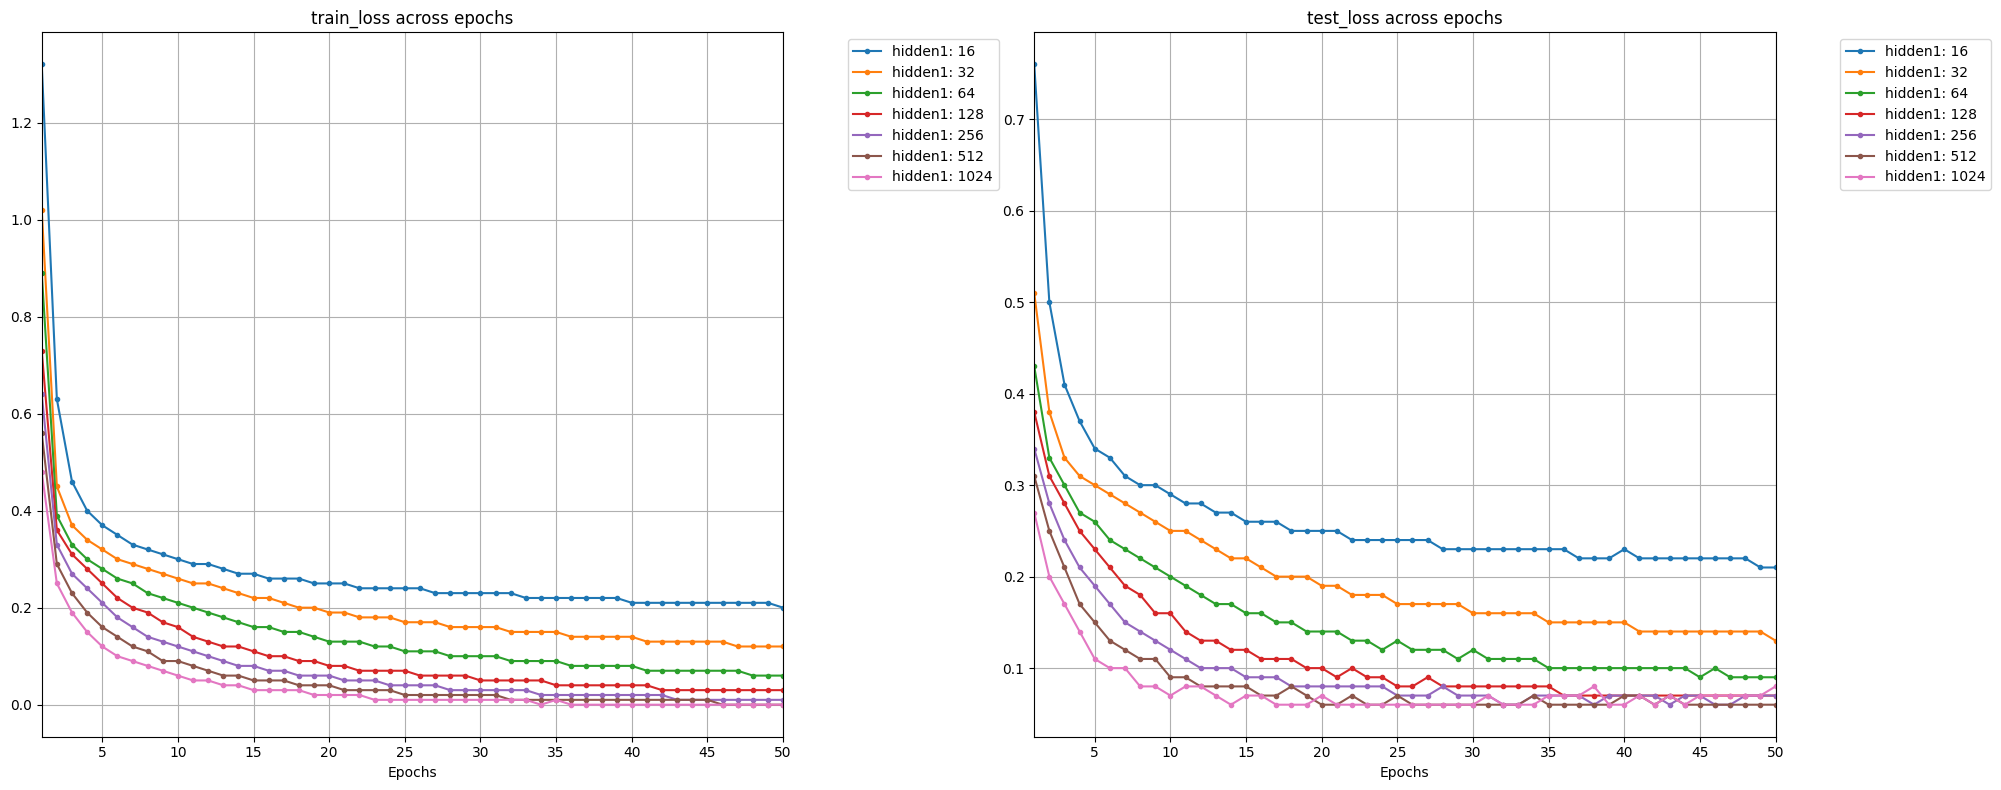

In [7]:
plot_metric_for_multiple_models(metrics, ["train_loss", "test_loss"], NUM_TRAINING_EPOCHS)

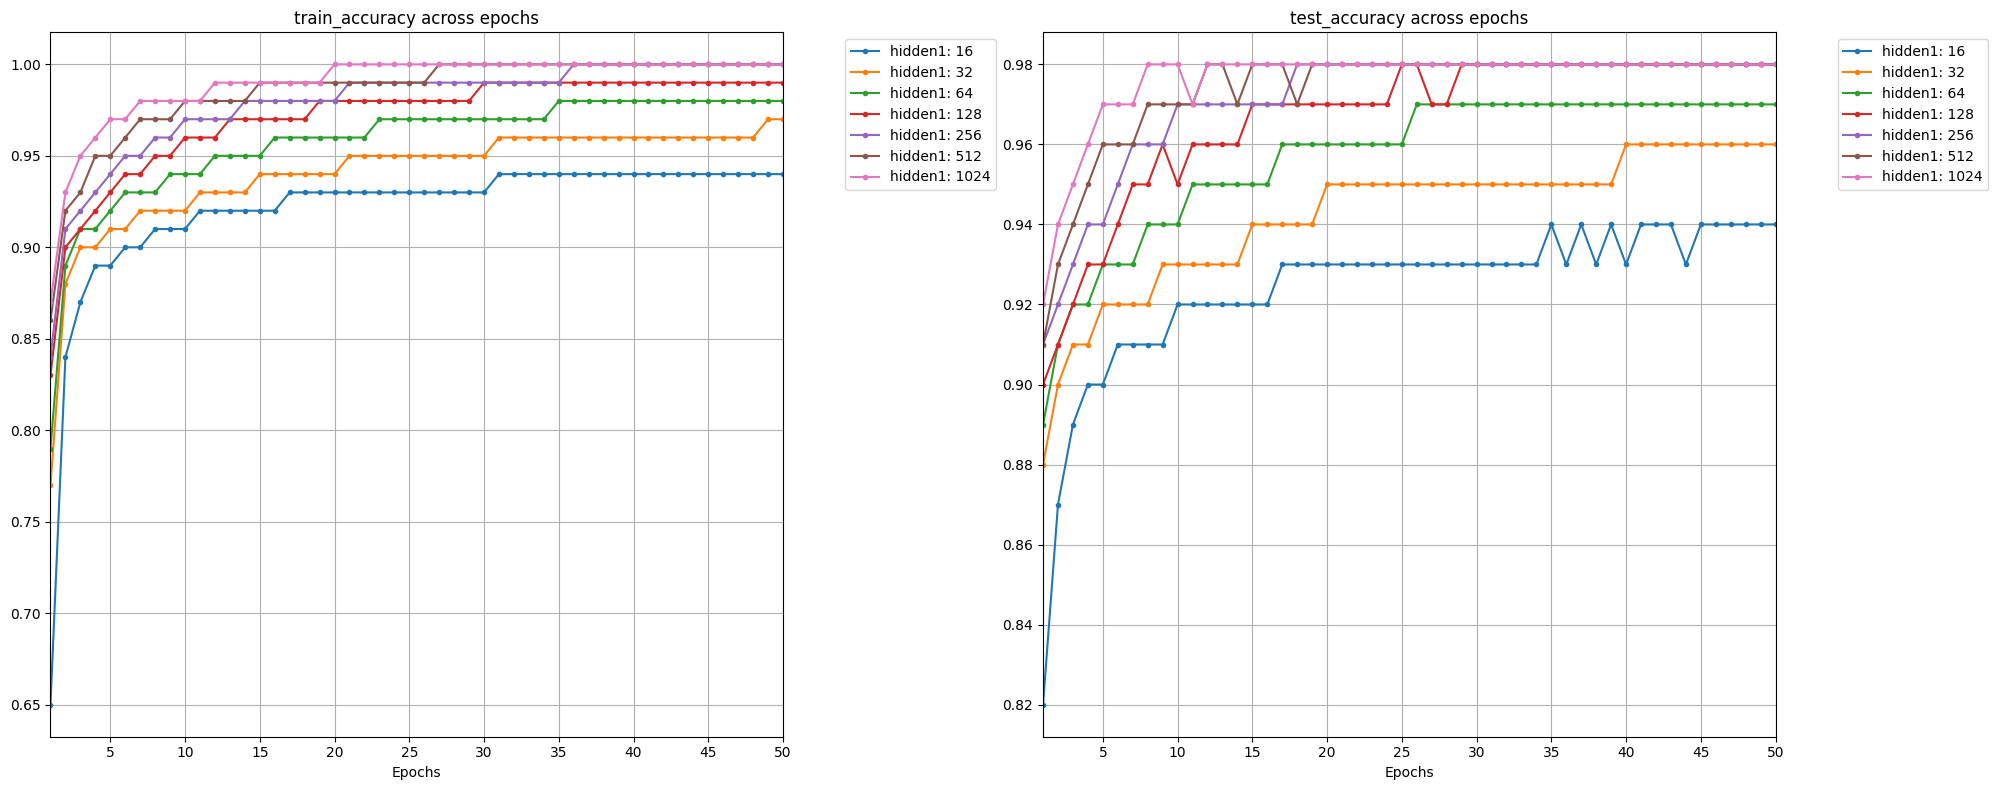

In [8]:
plot_metric_for_multiple_models(metrics, ["train_accuracy", "test_accuracy"], NUM_TRAINING_EPOCHS)

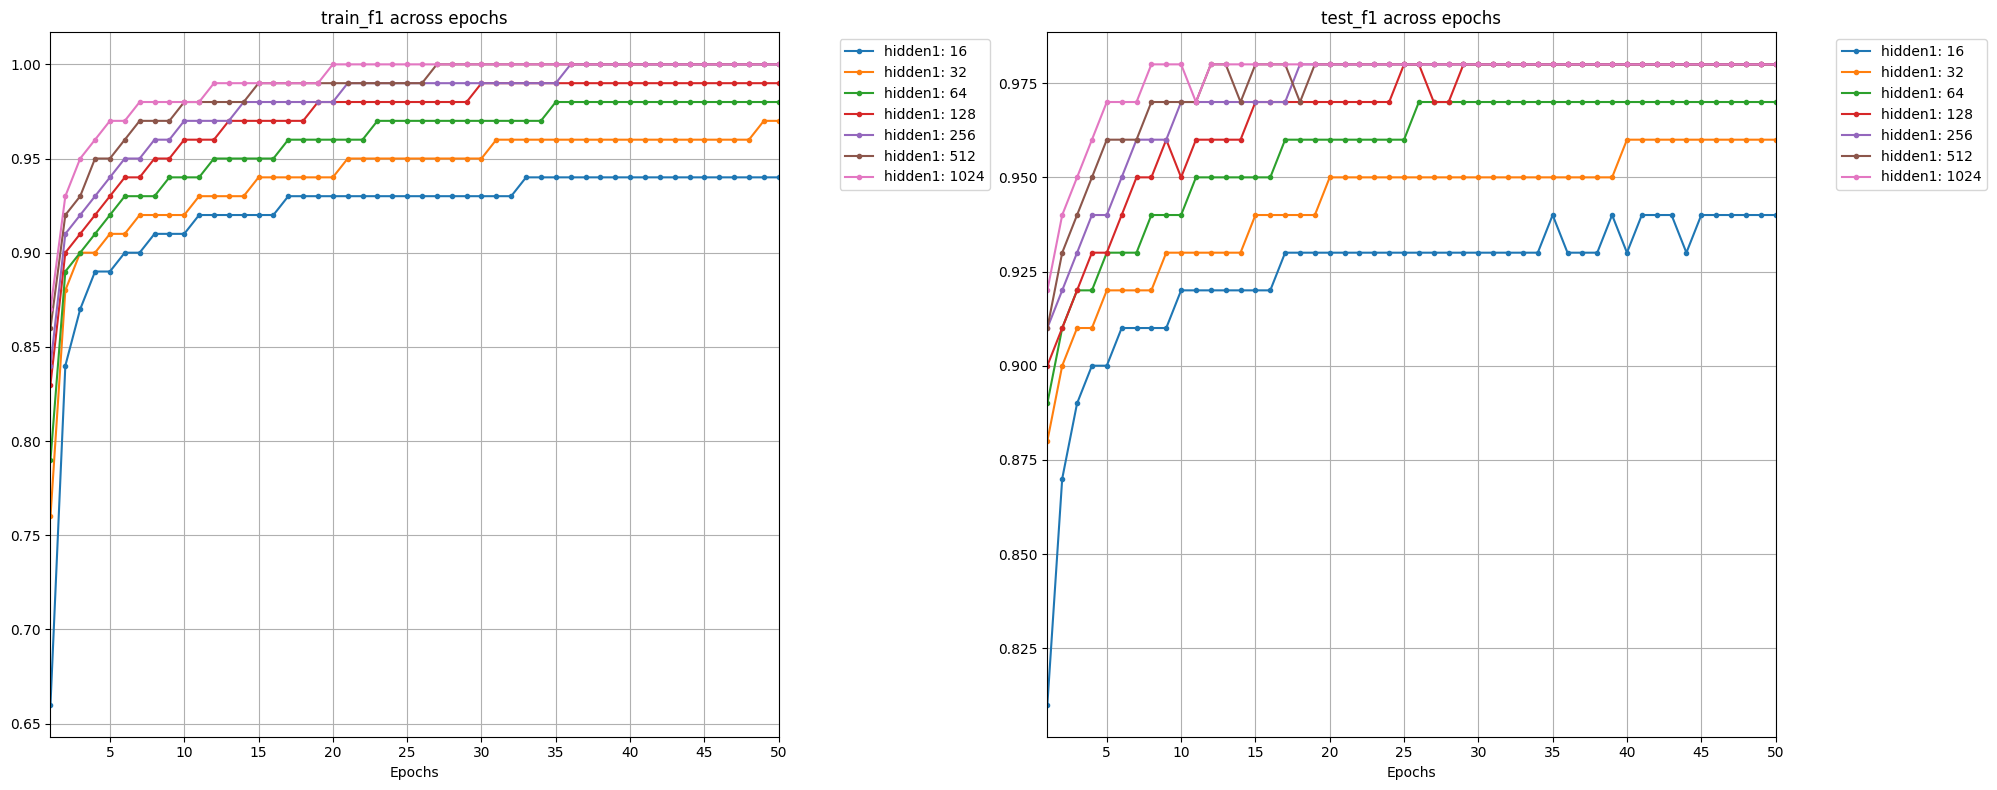

In [9]:
plot_metric_for_multiple_models(metrics, ["train_f1", "test_f1"], NUM_TRAINING_EPOCHS)

## We can notice expected behavior, larger network optimizes the training in a faster manner. 
- ### You can spot it by observing the gap between the models with 16 and 1024 neurons

- ### Additionally, after ~50% of epochs the learning flattens and we can define the clear value added of adding more neurons to the network. 
- ### For example, increasing the number of neurons from 16 to 1024 leads to ~5% higher test accuracy
- ### Unfortunately, I can't see the overfitting after training for such a long time, so we will not observe any decrease in the test metrics of larger networks after N epochs.

### Let's increase the depth of the networks, maybe the behavior will be different

In [5]:
# two hidden layers
sizes_to_test = [[16, 16],
                 [32, 32],
                 [64, 64],
                 [128, 128],
                 [256, 256],
                 [512, 512],]

In [6]:
metrics = obtain_results_for_multiple_models(sizes_to_test=sizes_to_test, train_dataloader=train_dataloader, test_dataloader=test_dataloader)

Epoch 50/50 | Train Loss: 0.18 | Test Loss: 0.19: 100%|██████████| 50/50 [02:32<00:00,  3.05s/it]
Epoch 50/50 | Train Loss: 0.12 | Test Loss: 0.14: 100%|██████████| 50/50 [02:32<00:00,  3.04s/it]
Epoch 50/50 | Train Loss: 0.05 | Test Loss: 0.08: 100%|██████████| 50/50 [17:13<00:00, 20.66s/it] 
Epoch 50/50 | Train Loss: 0.01 | Test Loss: 0.07: 100%|██████████| 50/50 [02:42<00:00,  3.26s/it]
Epoch 50/50 | Train Loss: 0.00 | Test Loss: 0.08: 100%|██████████| 50/50 [02:57<00:00,  3.56s/it]
Epoch 50/50 | Train Loss: 0.00 | Test Loss: 0.13: 100%|██████████| 50/50 [03:14<00:00,  3.89s/it]


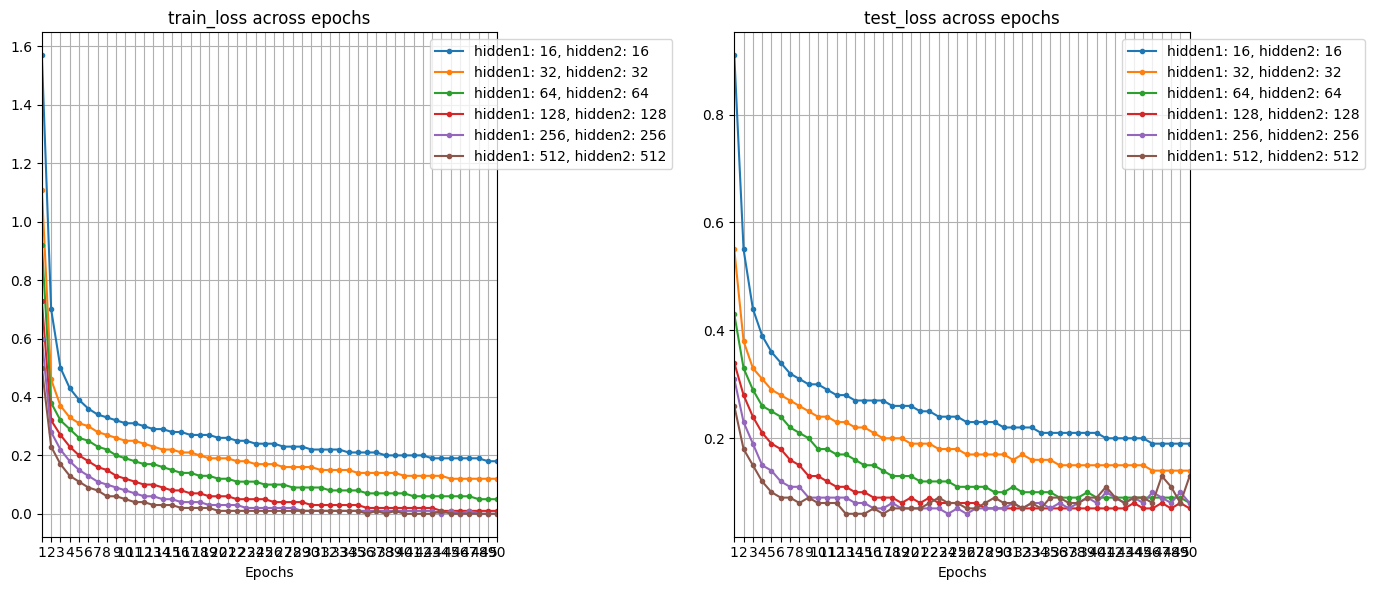

In [7]:
plot_metric_for_multiple_models(metrics, ["train_loss", "test_loss"], NUM_TRAINING_EPOCHS)

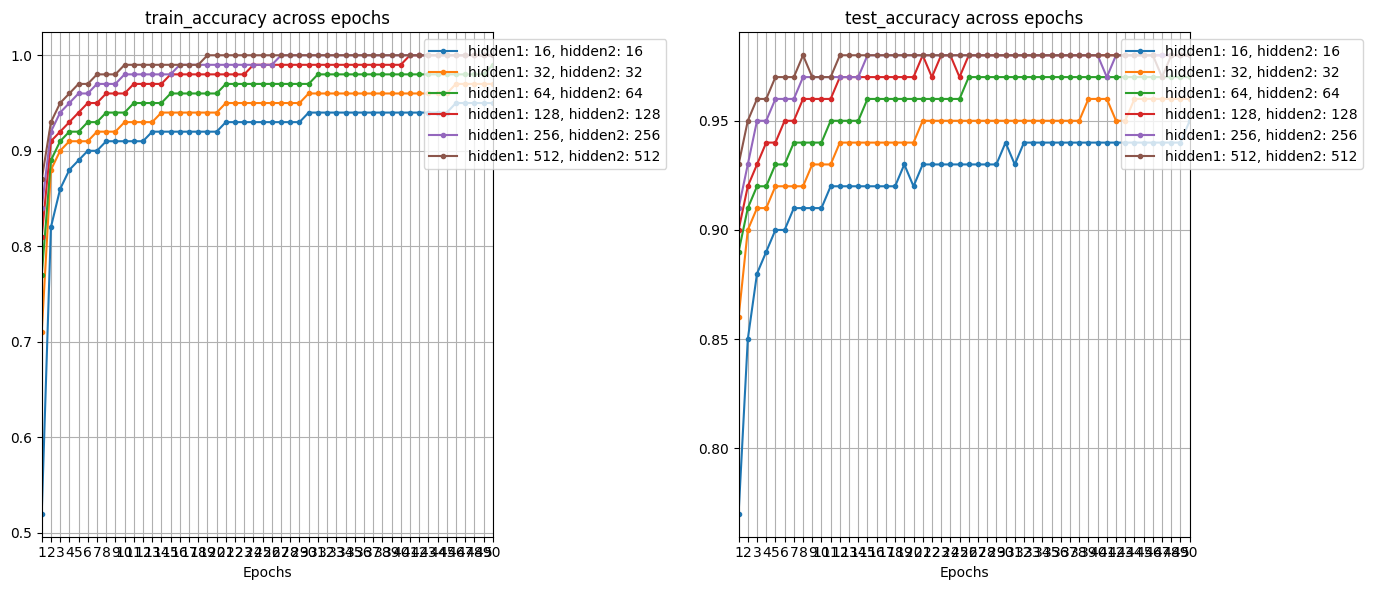

In [8]:
plot_metric_for_multiple_models(metrics, ["train_accuracy", "test_accuracy"], NUM_TRAINING_EPOCHS)

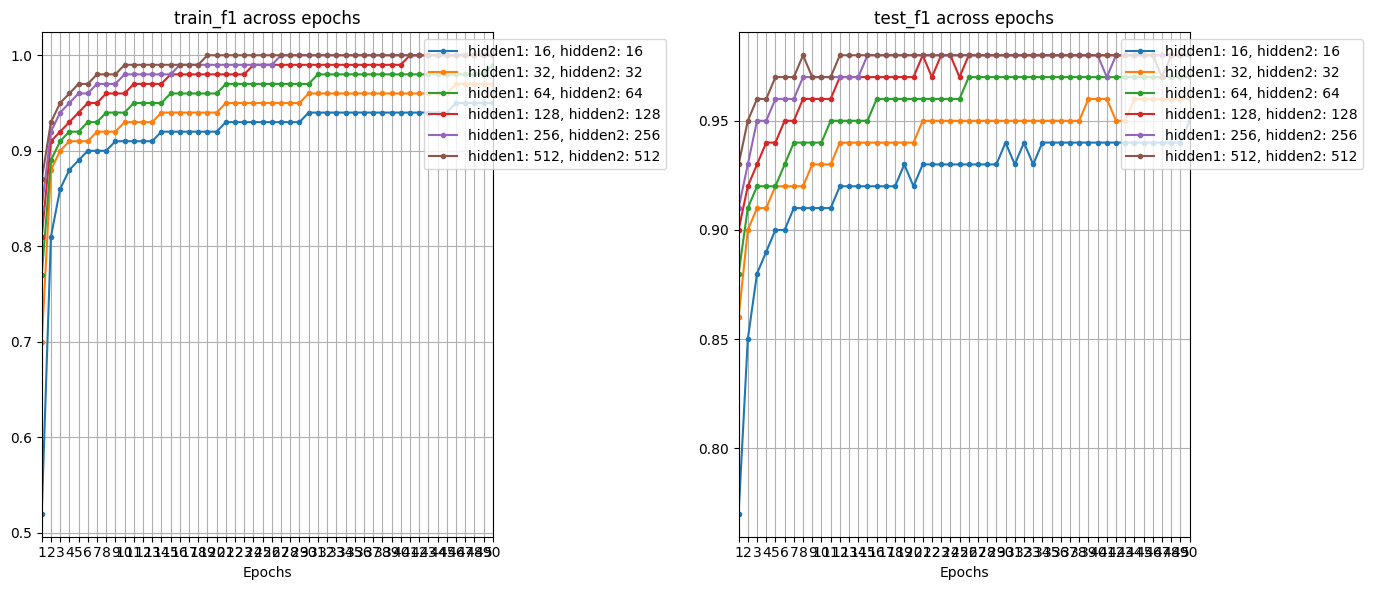

In [9]:
plot_metric_for_multiple_models(metrics, ["train_f1", "test_f1"], NUM_TRAINING_EPOCHS)

## Course of training looks very similar to the networks with one hidden layer, however, thanks to more parameters, models optimize faster.
- ### Another interesting observation is that we hit the ceiling. Model with 512 neurons in hidden layer is able to achieve the same performance as the one with 2 times more neurons in the layers.
- ### We can finally see some signs of overfitting, the test loss of the largest model starts to reverse its direction.
- ### It seems like MNIST is a really easy task for Neural Networks, model with 64 neurons in hidden layers is totally enough to ensure high value of metrics

### Final size increase - no we should clearly observe the overfitting in case of larger models

In [17]:
# three hidden layers
sizes_to_test = [[16, 16, 16],
                 [32, 32, 32],
                 [64, 64, 64],
                 [128, 128, 128],
                 [256, 256, 256],
                 [512, 512, 512],]

In [12]:
metrics = obtain_results_for_multiple_models(sizes_to_test=sizes_to_test, train_dataloader=train_dataloader, test_dataloader=test_dataloader)

Epoch 50/50 | Train Loss: 0.22 | Test Loss: 0.24: 100%|██████████| 50/50 [02:33<00:00,  3.07s/it]
Epoch 50/50 | Train Loss: 0.11 | Test Loss: 0.13: 100%|██████████| 50/50 [02:34<00:00,  3.09s/it]
Epoch 50/50 | Train Loss: 0.04 | Test Loss: 0.09: 100%|██████████| 50/50 [02:39<00:00,  3.18s/it]
Epoch 50/50 | Train Loss: 0.01 | Test Loss: 0.09: 100%|██████████| 50/50 [02:45<00:00,  3.31s/it]
Epoch 50/50 | Train Loss: 0.00 | Test Loss: 0.09: 100%|██████████| 50/50 [03:00<00:00,  3.61s/it]
Epoch 50/50 | Train Loss: 0.00 | Test Loss: 0.09: 100%|██████████| 50/50 [03:42<00:00,  4.45s/it]


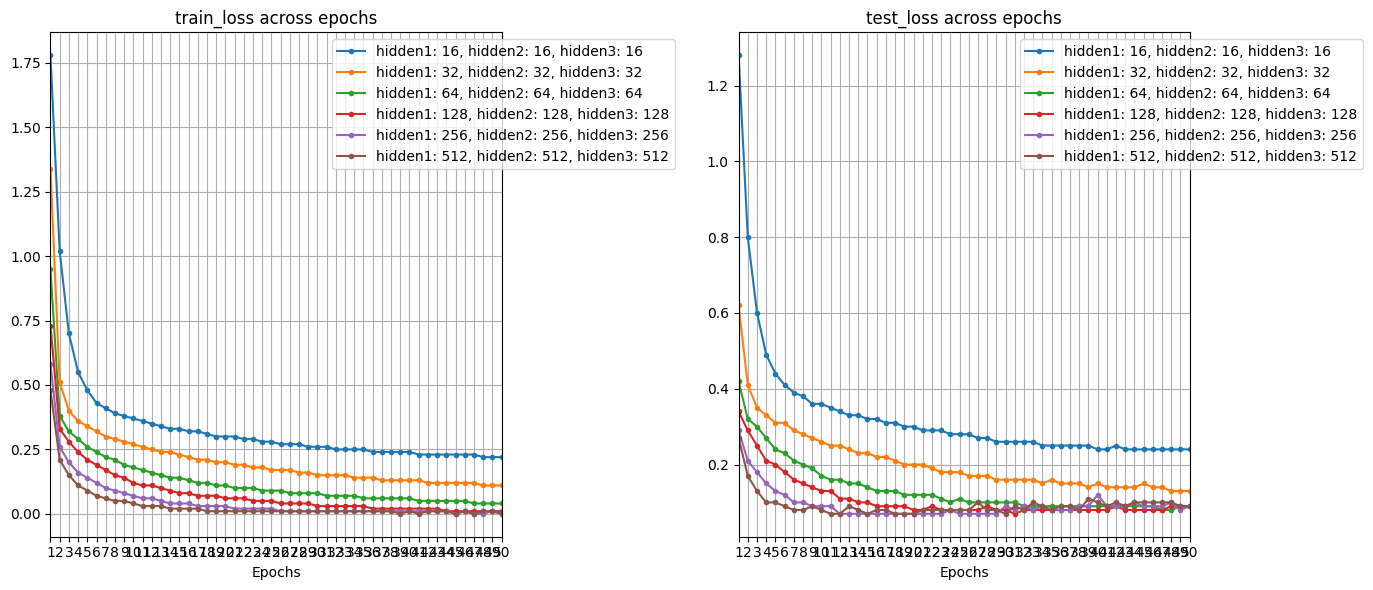

In [13]:
plot_metric_for_multiple_models(metrics, ["train_loss", "test_loss"], NUM_TRAINING_EPOCHS)

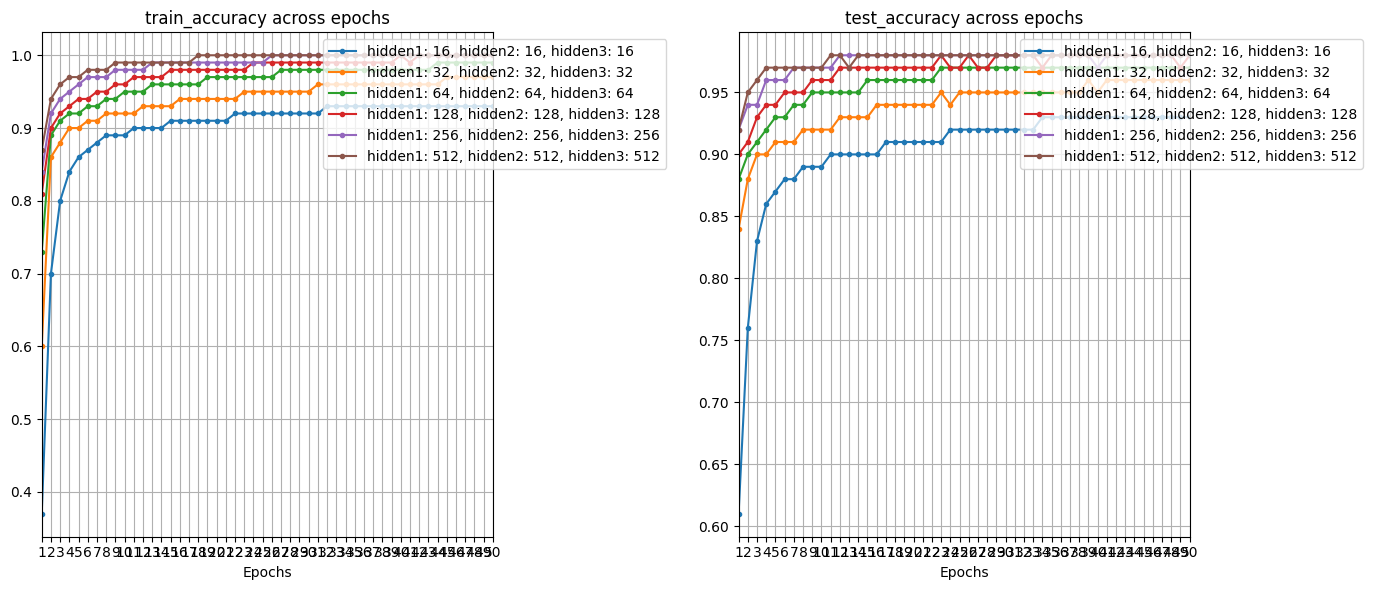

In [14]:
plot_metric_for_multiple_models(metrics, ["train_accuracy", "test_accuracy"], NUM_TRAINING_EPOCHS)

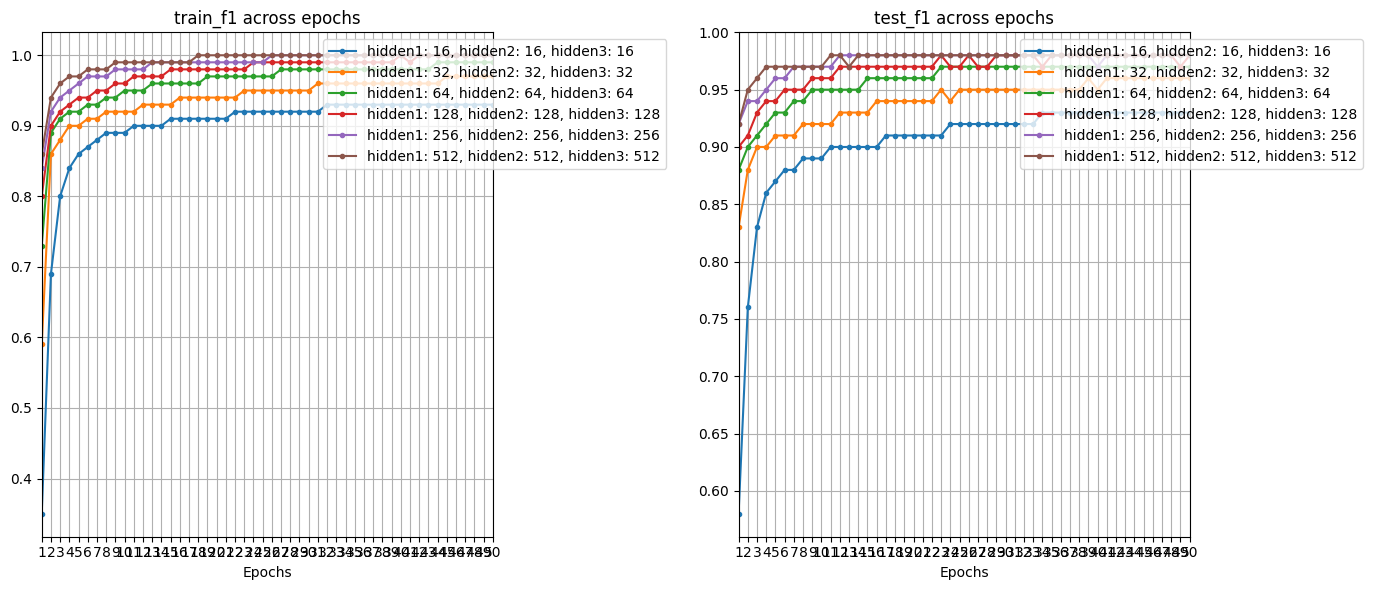

In [15]:
plot_metric_for_multiple_models(metrics, ["train_f1", "test_f1"], NUM_TRAINING_EPOCHS)

## Increasing the size of Neural Network does not guarantee further improvement in test metrics. It is just a waste of computations. 
- ### Once again, test loss for largest model starts to bounce back and increase
### There is one more thing I would like to check, how squeezing the information in the middle of the model affects the training process, let's do it.

In [22]:
# three hidden layers
sizes_to_test = [[128, 64, 128],
                 [128, 16, 128],
                 [128, 2, 128],
                 [128, 1, 128],
                 [512, 1, 512]]

In [23]:
metrics = obtain_results_for_multiple_models(sizes_to_test=sizes_to_test, train_dataloader=train_dataloader, test_dataloader=test_dataloader)

Epoch 50/50 | Train Loss: 0.01 | Test Loss: 0.09: 100%|██████████| 50/50 [02:48<00:00,  3.36s/it]
Epoch 50/50 | Train Loss: 0.02 | Test Loss: 0.08: 100%|██████████| 50/50 [02:45<00:00,  3.32s/it]
Epoch 50/50 | Train Loss: 0.14 | Test Loss: 0.24: 100%|██████████| 50/50 [02:47<00:00,  3.35s/it]
Epoch 50/50 | Train Loss: 0.58 | Test Loss: 0.73: 100%|██████████| 50/50 [02:44<00:00,  3.29s/it]
Epoch 50/50 | Train Loss: 2.30 | Test Loss: 2.30: 100%|██████████| 50/50 [03:07<00:00,  3.75s/it]


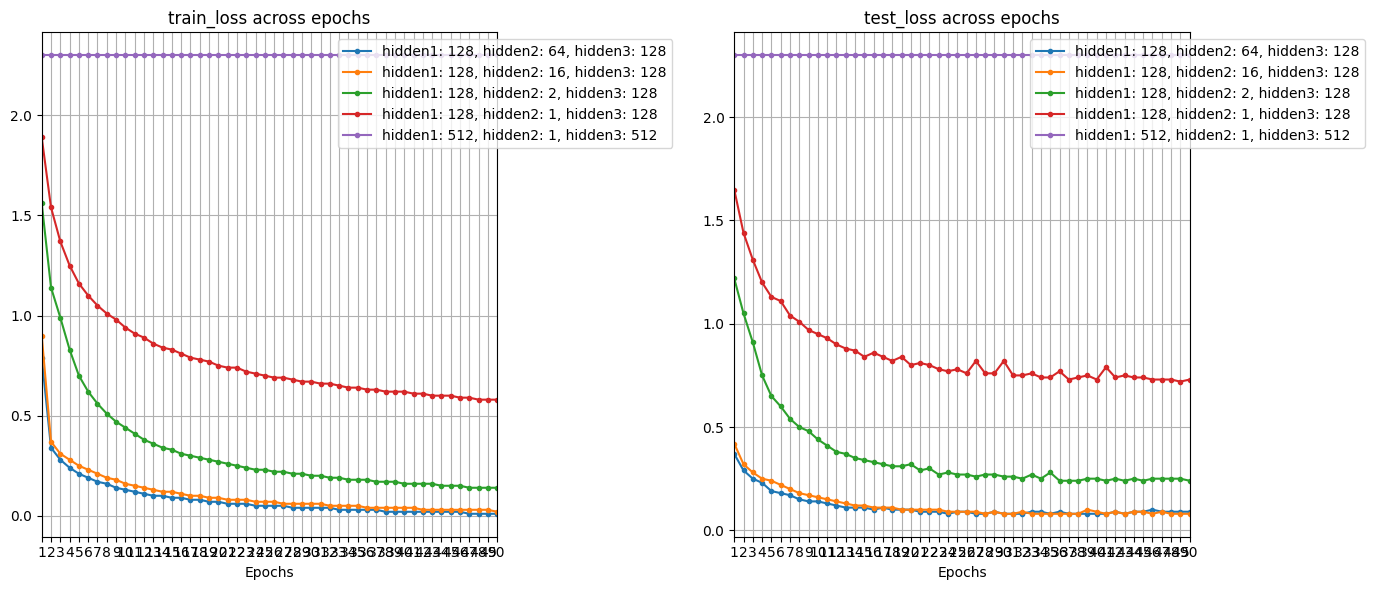

In [24]:
plot_metric_for_multiple_models(metrics, ["train_loss", "test_loss"], NUM_TRAINING_EPOCHS)

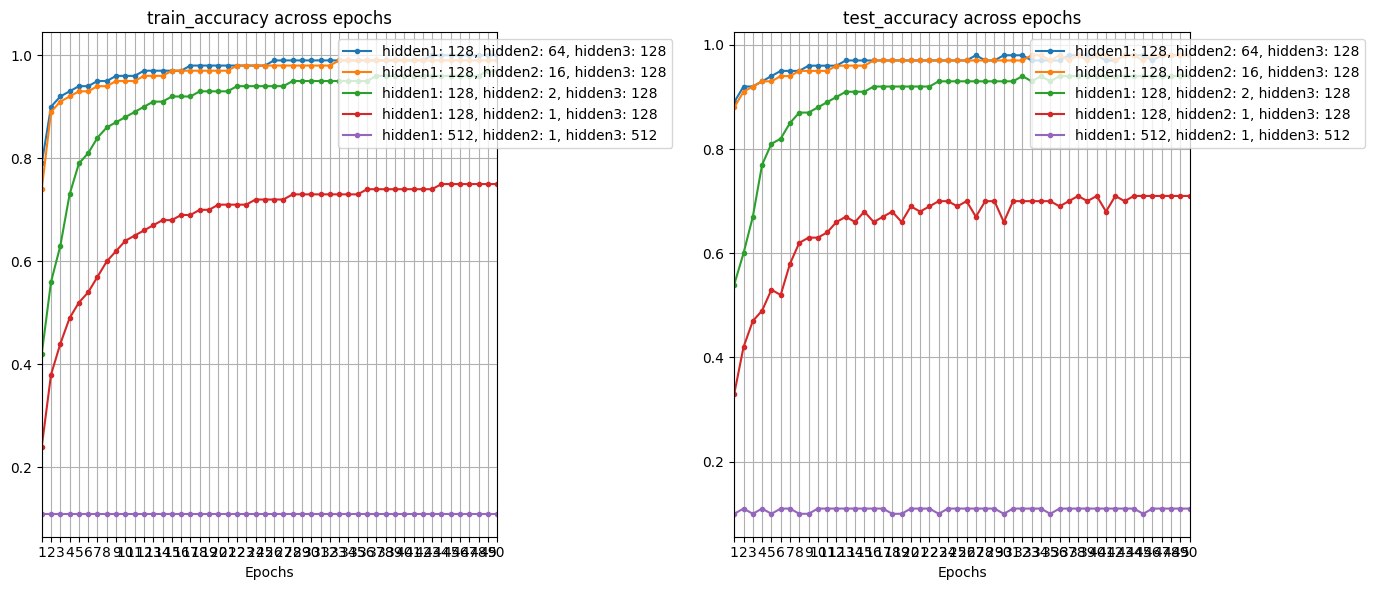

In [25]:
plot_metric_for_multiple_models(metrics, ["train_accuracy", "test_accuracy"], NUM_TRAINING_EPOCHS)

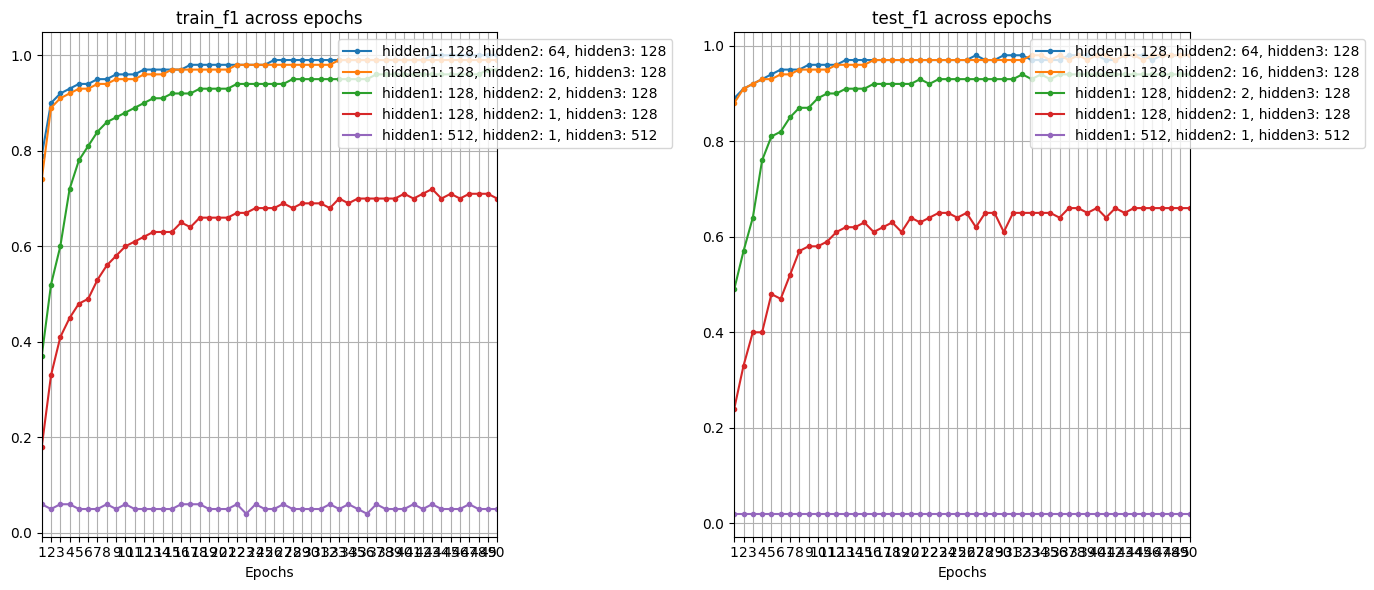

In [26]:
plot_metric_for_multiple_models(metrics, ["train_f1", "test_f1"], NUM_TRAINING_EPOCHS)

## Creating a huge bottleneck leads to limiting network's ability to learn
- ### Increasing the number of neurons in the middle layer from 1 to 2 brings a really large improvement
- ### When other layers contain many neurons and middle layer has only 1, then the network stops learning

In [27]:
# three hidden layers
sizes_to_test = [[64, 128, 64],
                 [64, 256, 64],
                 [64, 512, 64],
                 [64, 1024, 64]]

In [28]:
metrics = obtain_results_for_multiple_models(sizes_to_test=sizes_to_test, train_dataloader=train_dataloader, test_dataloader=test_dataloader)

Epoch 50/50 | Train Loss: 0.04 | Test Loss: 0.10: 100%|██████████| 50/50 [02:42<00:00,  3.25s/it]
Epoch 50/50 | Train Loss: 0.02 | Test Loss: 0.09: 100%|██████████| 50/50 [02:47<00:00,  3.35s/it]
Epoch 50/50 | Train Loss: 0.01 | Test Loss: 0.10: 100%|██████████| 50/50 [17:55<00:00, 21.52s/it]   
Epoch 50/50 | Train Loss: 0.01 | Test Loss: 0.10: 100%|██████████| 50/50 [27:33<00:00, 33.07s/it]   


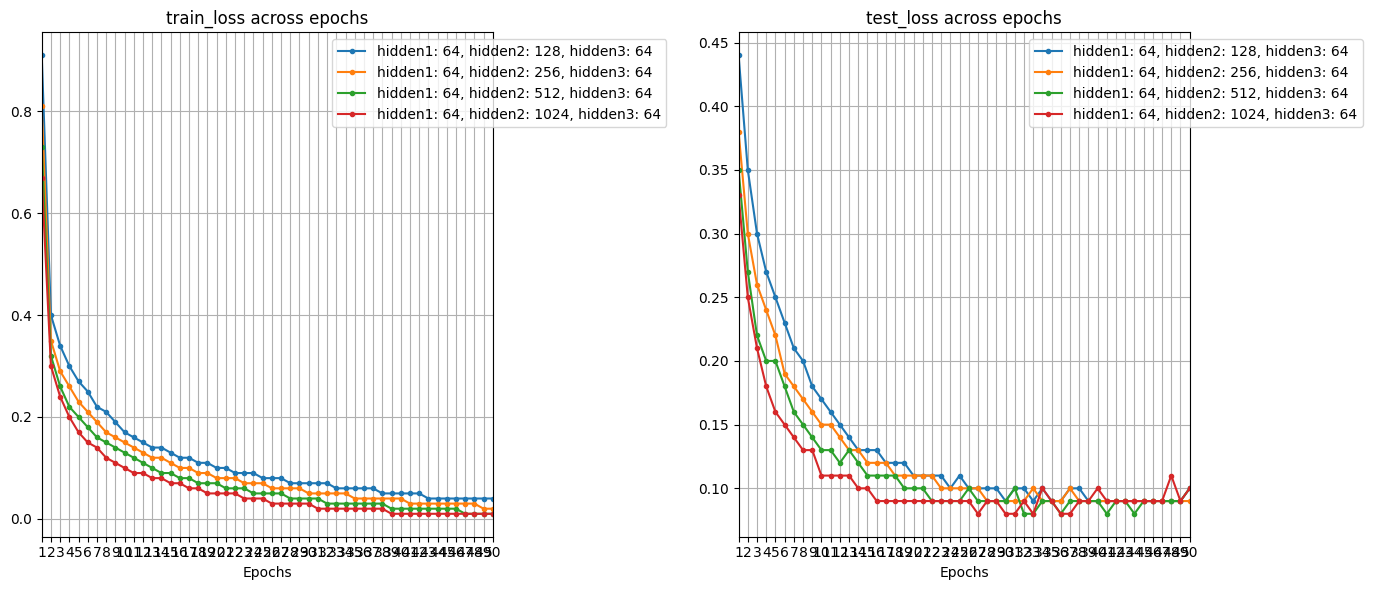

In [29]:
plot_metric_for_multiple_models(metrics, ["train_loss", "test_loss"], NUM_TRAINING_EPOCHS)

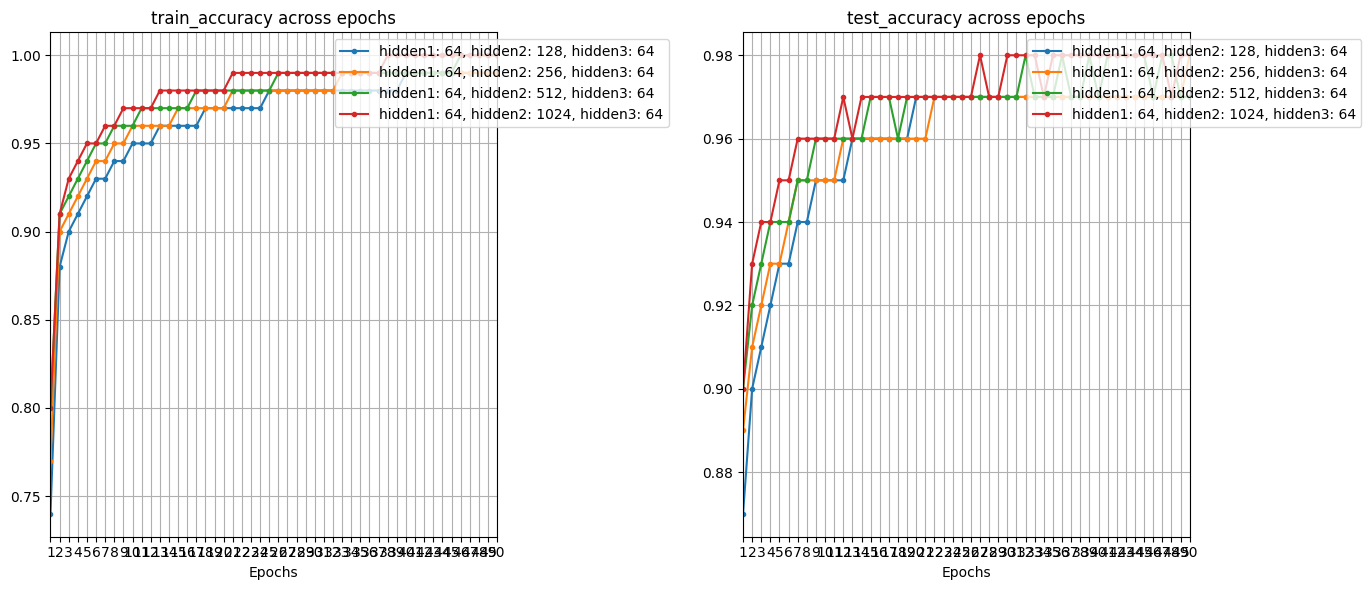

In [30]:
plot_metric_for_multiple_models(metrics, ["train_accuracy", "test_accuracy"], NUM_TRAINING_EPOCHS)

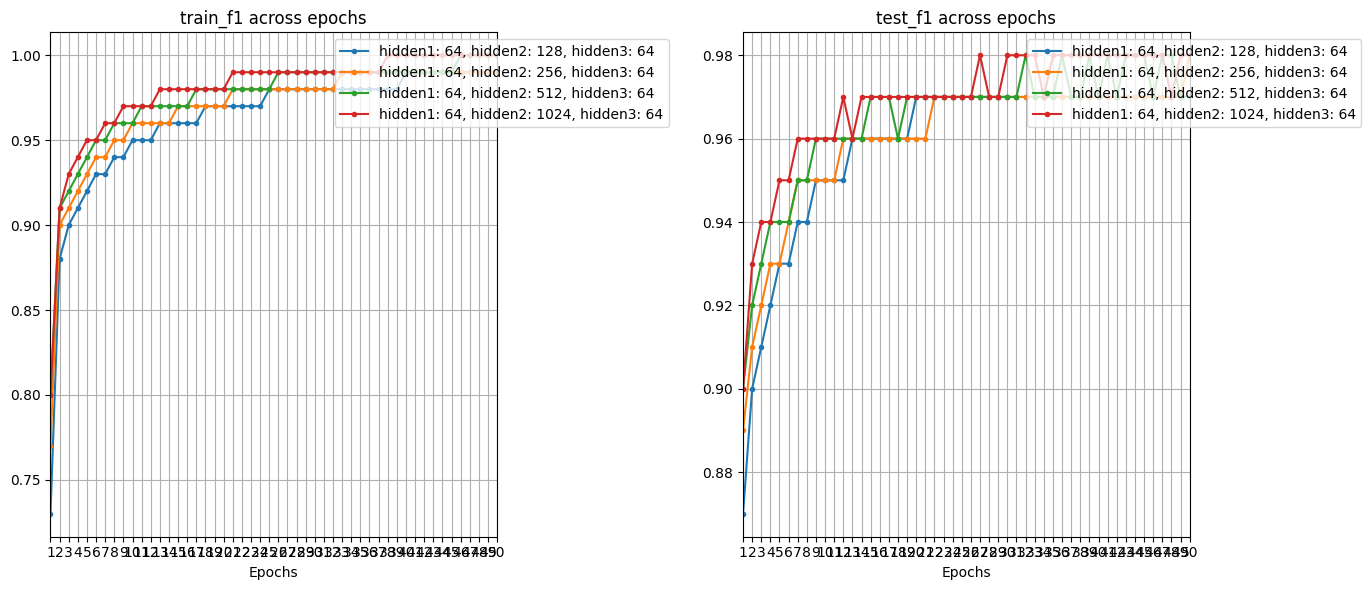

In [31]:
plot_metric_for_multiple_models(metrics, ["train_f1", "test_f1"], NUM_TRAINING_EPOCHS)

## Widening the middle layer leads to the faster process of learnin, but the difference at the end is marginal.

# Conclusions
## Based on the performed experiments we can observe that:
- ### When we are operating with only one hidden layer in the Network, then it is really valuable to increase the number of neurons.
- ### However, when we define a model with 3 hidden layers, then the difference in performance between the networks with 64 and 512 neurons in each layer respectively is marginal. 
- ### In case of 512 neurons in each hidden layer we end up with a network containing 922,122 parameters vs 57,930 parameters when 64 neurons are applied.
- ### It seems like MNIST a really easy dataset for a Neural Network. I generally thought that we will be able to observe more overfitting of large models and differences in performance across architectures.
- ### A simple logistic regression achieves 92% accuracy on this dataset (https://stats.stackexchange.com/questions/426873/how-does-a-simple-logistic-regression-model-achieve-a-92-classification-accurac).
- ### I will try to add experiments on a harder dataset soon :).